In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import imutils
import cv2
import numpy as np
from scipy.optimize import curve_fit
import matplotlib as mpl
from math import ceil


In [2]:
def alpha_curve(ncolors):
    x = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
    y = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402]) / 1.255

    # this is the function we want to fit to our data
    def func(x, a, b):
        'nonlinear function in a and b to fit to data'
        return a * x / (b + x)

    initial_guess = [1.2, 0.03]
    pars, pcov = curve_fit(func, x, y, p0=initial_guess)

    linspace = np.linspace(0, 1, ncolors)
    color_alpha = func(linspace, pars[0], pars[1])
    color_alpha /= np.amax(color_alpha)
    
    return color_alpha


In [7]:
ncolors = 256

# Log-ish Alpha scale
color_alpha = alpha_curve(ncolors)

# Above mean colormap
color_array = plt.get_cmap('Reds')(range(ncolors))
color_array[:,-1] = color_alpha
map_object = LinearSegmentedColormap.from_list(name='above_mean',colors=color_array)
# plt.register_cmap(cmap=map_object)


In [8]:
ncolors = 200

color_alpha = alpha_curve(ncolors)

# for reds
high_range = [round(x, 1) for x in np.arange(0, 20, 0.1)]
reds = plt.get_cmap('Reds')(range(ncolors))
reds[:,-1] = color_alpha
red_dict = {x: y for x,y in zip(high_range, reds)}

def get_reds(value):
    return reds[int(round(value, 1) * 10)]

get_reds = np.vectorize(get_reds)


# index for upper int(round(val, 0.1) * 10)
# index for lower int(ncolors - abs(round(val, 1) * 10))

# for blues
low_range = [round(x, 1) for x in  np.arange(-20, 0, 0.1)]
blues = plt.get_cmap('Blues')(range(ncolors))
blues[:,-1] = np.flip(color_alpha)
blue_dict = {x: y for x,y in zip(low_range, blues)}

def get_blues(value):
    return blues[int(ncolors - abs(round(value, 1) * 10))]

get_blues = np.vectorize(get_blues)

In [13]:

color_alpha = alpha_curve(ncolors)

# for reds
high_range = [round(x, 1) for x in np.arange(0, 20, 0.1)]
reds = plt.get_cmap('Reds')(range(ncolors))
# reds[:,-1] = color_alpha

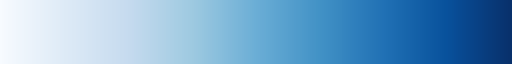

In [16]:
plt.get_cmap('Blues')

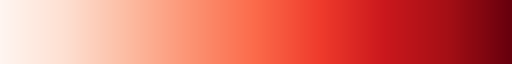

In [15]:
plt.get_cmap('Reds')

In [22]:
len(range(int(ncolors-(ncolors/2)), int(ncolors+(ncolors/2))))

200

In [16]:
plt.get_cmap('Reds')(range(ncolors))

array([[0.98769704, 0.55101884, 0.42552864, 1.        ],
       [0.98757401, 0.54609765, 0.42060746, 1.        ],
       [0.98745098, 0.54117647, 0.41568627, 1.        ],
       [0.98732795, 0.53625529, 0.41076509, 1.        ],
       [0.98720492, 0.5313341 , 0.40584391, 1.        ],
       [0.98708189, 0.52641292, 0.40092272, 1.        ],
       [0.98695886, 0.52149173, 0.39600154, 1.        ],
       [0.98683583, 0.51657055, 0.39108035, 1.        ],
       [0.9867128 , 0.51164937, 0.38615917, 1.        ],
       [0.98658977, 0.50672818, 0.38123799, 1.        ],
       [0.98646674, 0.501807  , 0.3763168 , 1.        ],
       [0.98634371, 0.49688581, 0.37139562, 1.        ],
       [0.98622068, 0.49196463, 0.36647443, 1.        ],
       [0.98609765, 0.48704344, 0.36155325, 1.        ],
       [0.98597463, 0.48212226, 0.35663206, 1.        ],
       [0.9858516 , 0.47720108, 0.35171088, 1.        ],
       [0.98572857, 0.47227989, 0.3467897 , 1.        ],
       [0.98560554, 0.46735871,

In [79]:
residuals = np.random.uniform(low=-19.9, high=19.9, size=(256, 256))
residuals = np.round(residuals, 1)

In [80]:
threshold = 2

# Values that fall below the mean/threshold
below_zero = residuals.copy()
below_zero[below_zero > -threshold] = 0

# Values that fall above the mean/threshold
above_zero = residuals.copy()
above_zero[above_zero < threshold] = 0

In [92]:
az_viz = np.zeros((*above_zero.shape, 4))

for value, color in red_dict.items():
    az_viz[above_zero == value] = color

In [105]:
az_viz.shape

(256, 256, 4)

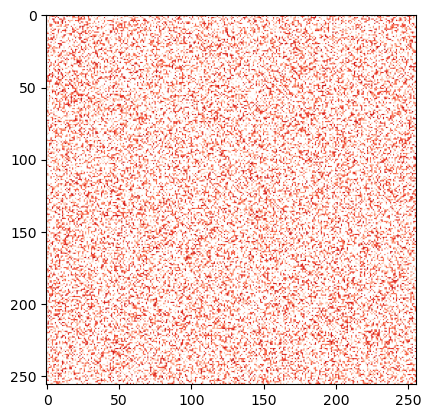

In [104]:
plt.imshow(az_viz)

In [99]:
from PIL import Image

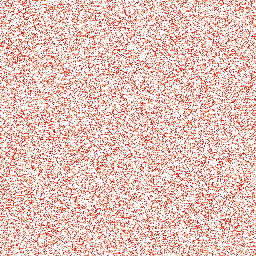

In [107]:
Image.fromarray(np.uint8(az_viz * 255), mode="RGBA")